# **Importing Libraries**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow_datasets as tfds

# **Donwload Fashion MNIST Dataset**

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteUK5YSA/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteUK5YSA/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [5]:
metadata.name

'fashion_mnist'

In [6]:
metadata.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [7]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

In [8]:
train_dataset, test_dataset = dataset['train'], dataset['test']
len(train_dataset), len(test_dataset)

(60000, 10000)

In [11]:
class_names = metadata.features['label'].names
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [14]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
num_train_examples, num_test_examples

(60000, 10000)

# **Preprocess Dataset**

In [15]:
def normalize_dataset(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255

  return images, labels

In [16]:
train_dataset = train_dataset.map(normalize_dataset)
test_dataset = test_dataset.map(normalize_dataset)

In [17]:
for image, label in train_dataset.take(1):
  break

In [21]:
image.numpy().reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07058824,
        0.3019608 , 0.8901961 , 0.8901961 , 0.8156863 , 0.8235294 ,
        0.88235295, 0.84705883, 0.33333334, 0.1254902 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23921569, 0.39215687, 0.38039216,
        0.3137255 , 0.22352941, 0.45882353, 0.8901961 , 0.93333334,
        0.4509804 , 0.19215687, 0.30588236, 0.41568628, 0.42352942,
        0.2784314 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.31764707, 0.4117647 , 0.3137255 , 0.27058825,
        0.28235295, 0.2509804 , 0.17254902, 0.08235294, 0.05098039,
        0.17254902, 0.2705

In [22]:
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

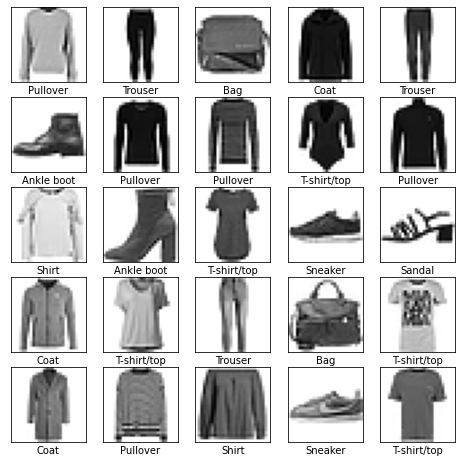

In [23]:
plt.figure(figsize=(8,8))

for i, (image, label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])

plt.show()

# **Build the Model**

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=tf.nn.relu, 
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3,), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
train_dataset

<CacheDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [27]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [29]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [30]:
num_train_examples/BATCH_SIZE

1875.0

In [31]:
history = model.fit(train_dataset,
                    epochs=5,
                    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 82s 40ms/step - loss: 0.3924 - accuracy: 0.8578
Epoch 2/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2563 - accuracy: 0.9056
Epoch 3/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2134 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1801 - accuracy: 0.9336
Epoch 5/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1514 - accuracy: 0.9447


# **Evaluate the accuracy**

In [32]:
test_loss, test_accuracy = model.evaluate(test_dataset,
                                          steps=math.ceil(num_test_examples/BATCH_SIZE))

313/313 [==============================] - 6s 17ms/step - loss: 0.2748 - accuracy: 0.9118


In [33]:
print(f'TEST LOSS: {test_loss}')
print(f'TEST ACCURACY: {test_accuracy}')

TEST LOSS: 0.2748013734817505
TEST ACCURACY: 0.9118000268936157


# **Make Predictions**

In [34]:
for test_image, test_label in test_dataset.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  predictions = model.predict(test_image)

In [35]:
test_label, test_label.shape

(array([4, 4, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
        4, 4, 2, 7, 7, 4, 2, 4, 7, 5]), (32,))

In [36]:
test_image.shape

(32, 28, 28, 1)

In [37]:
predictions.shape

(32, 10)

In [38]:
predictions[0]

array([4.7491844e-07, 3.0891565e-07, 1.5600612e-03, 1.1733349e-07,
       9.7933358e-01, 1.3882358e-08, 1.9105386e-02, 1.4537568e-09,
       2.1324043e-08, 2.1647788e-08], dtype=float32)

In [39]:
np.argmax(predictions, axis=1)

array([4, 4, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
       4, 4, 4, 7, 7, 4, 2, 4, 7, 5])

In [40]:
index = 0
np.argmax(predictions[index]), test_label[index], class_names[test_label[index]]

(4, 4, 'Coat')

# **Visualize**

In [41]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, image = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(image[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(f'{class_names[predicted_label]} - {100*np.max(predictions_array):.2f}  ({class_names[true_label]})', color=color)

In [42]:
def plot_value_array(i, predictions_array, true_labels):
  predictions_array, true_label = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')

  # The ylim() function in pyplot module of matplotlib library is used to get or set the y-limits of the current axes.
  plt.ylim([0, 1])


  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

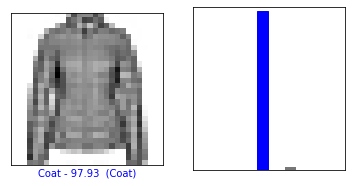

In [43]:
i = 0
plt.figure(figsize=(6, 3 ))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_label, test_image)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_label)


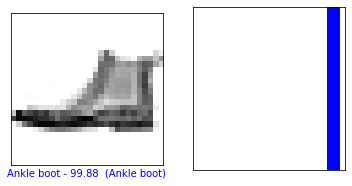

In [44]:
i = 2
plt.figure(figsize=(6, 3 ))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_label, test_image)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_label)


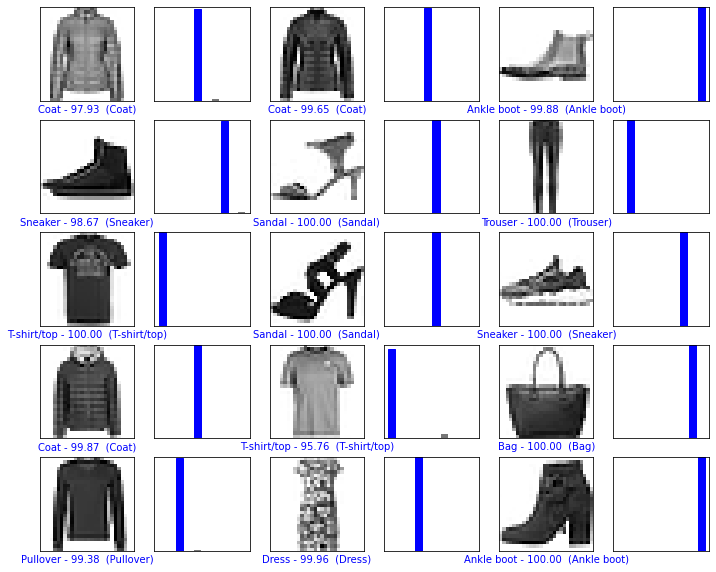

In [45]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_label)